In [2]:
from helper.data_handler import *
from classifier.classification_handler import *
import helper.visuals as vs

In [3]:
data_zarok = DataHandler("zarok01")
cl_zarok = ClassificationHandler(data_zarok.data_dict)

In [4]:
cl_zarok.classify("dt")

In [5]:
cl_zarok.results

{'20171129': 0.38058579419017263,
 '20171214': 0.75568181818181823,
 '20171215': 0.55590108100103652,
 '20171216': 0.49278082587352007,
 '20180110': 0.44632015400562713,
 '20180111': 0.54137849917666436,
 '20180112': 0.51813110181311017,
 '20180114': 0.54975340876124168,
 '20180115': 0.53813837468819747,
 '20180116': 0.4801997665770974,
 '20180117': 0.44914468694699589,
 '20180119': 0.49198180947821923,
 '20180120': 0.426027397260274,
 '20180122': 0.4752339020363236,
 '20180123': 0.48611293931815192,
 'average': 0.47421072245677814}

In [7]:
import warnings
warnings.filterwarnings('ignore')
cl_zarok.classify("rf")
cl_zarok.results

{'20171129': 0.65207193119624707,
 '20171214': 0.59090909090909094,
 '20171215': 0.56656300903302237,
 '20171216': 0.37467513716430839,
 '20180110': 0.38175625647860212,
 '20180111': 0.50025876264408375,
 '20180112': 0.47326824732682471,
 '20180114': 0.52030751378009865,
 '20180115': 0.54076408034659318,
 '20180116': 0.45862171918681977,
 '20180117': 0.4271509227268897,
 '20180119': 0.64408808042125421,
 '20180120': 0.18664383561643835,
 '20180122': 0.71821684094661531,
 '20180123': 0.64643938396735556,
 'average': 0.5097465958875639}

In [8]:
data_all = DataHandler("all")
cl_all = ClassificationHandler(data_all.data_dict)

In [9]:
cl_all.classify("dt")
cl_all.results

{'20171129': 0.46616948337042158,
 '20171130': 0.57407223251819373,
 '20171204': 0.59848484848484851,
 '20171205': 0.54210150107219446,
 '20171206': 0.54906054279749483,
 '20171214': 0.84659090909090906,
 '20171215': 0.60002961646675557,
 '20171216': 0.49278082587352007,
 '20180107': 0.54858177429088717,
 '20180108': 0.69808541973490423,
 '20180110': 0.49992595883311119,
 '20180111': 0.46713714420136437,
 '20180112': 0.49209669920966992,
 '20180114': 0.45459820133449375,
 '20180115': 0.52461599054745967,
 '20180116': 0.49159948972667805,
 '20180117': 0.46658801719052834,
 '20180119': 0.64097654380086166,
 '20180120': 0.59246575342465757,
 '20180122': 0.54182718767198679,
 '20180123': 0.67039620902988017,
 'average': 0.5599135404128962}

In [10]:
import warnings
warnings.filterwarnings('ignore')
cl_all.classify("rf")
cl_all.results

{'20171129': 0.60690443254946769,
 '20171130': 0.53177236360348956,
 '20171204': 0.5,
 '20171205': 0.59714081486776271,
 '20171206': 0.46458969005941864,
 '20171214': 0.35227272727272729,
 '20171215': 0.59070042943876799,
 '20171216': 0.54721339878717878,
 '20180107': 0.45051297525648765,
 '20180108': 0.77761413843888072,
 '20180110': 0.55057011698504366,
 '20180111': 0.68586215008233353,
 '20180112': 0.44769874476987448,
 '20180114': 0.46634754859297939,
 '20180115': 0.49547065773926741,
 '20180116': 0.46983144695057405,
 '20180117': 0.37962416786045333,
 '20180119': 0.57300143609382481,
 '20180120': 0.5746575342465754,
 '20180122': 0.62383048981838196,
 '20180123': 0.45254705804922996,
 'average': 0.5317307209943462}

In [11]:
data_punky = DataHandler("punky_2002")
cl_punky = ClassificationHandler(data_punky.data_dict)

In [12]:
cl_punky.classify("dt")
cl_punky.results

{'20171129': 0.51542671558308772,
 '20171130': 0.40232337386430411,
 '20171204': 0.72727272727272729,
 '20171205': 0.57183702644746248,
 'average': 0.5542149607918954}

In [13]:
warnings.filterwarnings('ignore')
cl_punky.classify("rf")
cl_punky.results

{'20171129': 0.46250075178925842,
 '20171130': 0.36382949871174797,
 '20171204': 0.51515151515151514,
 '20171205': 0.32637598284488922,
 'average': 0.4444145418578612}

In [14]:
## 287384 rows × 17 columns
import pandas as pd
merged_data = pd.DataFrame()
for key, value in data_all.data_dict.items():
    merged_data = pd.concat([merged_data, value])

In [16]:
from sklearn.preprocessing import StandardScaler
label = merged_data["RecommendedAct"]
feature_data = merged_data.drop(["RecommendedAct"], axis=1)

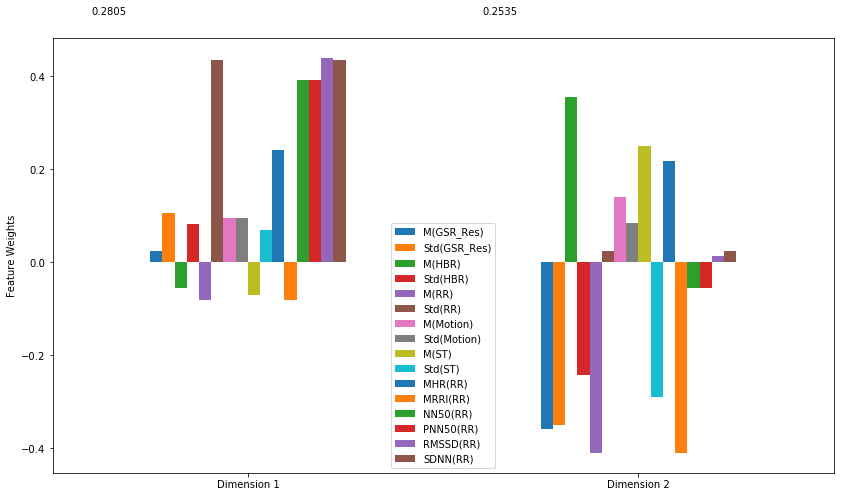

In [18]:
from sklearn.decomposition import PCA
scaled_data = StandardScaler().fit_transform(feature_data)
pca_data = pd.DataFrame(scaled_data, columns=["M(GSR_Res)", "Std(GSR_Res)", "M(HBR)", "Std(HBR)", "M(RR)", "Std(RR)", \
                                  "M(Motion)", "Std(Motion)", "M(ST)", "Std(ST)", "MHR(RR)", "MRRI(RR)", "NN50(RR)", \
                                  "PNN50(RR)", "RMSSD(RR)", "SDNN(RR)"])

pca = PCA(n_components = 2)
pca = pca.fit(pca_data)

# Generate PCA results plot
pca_results = vs.pca_results(pca_data, pca);

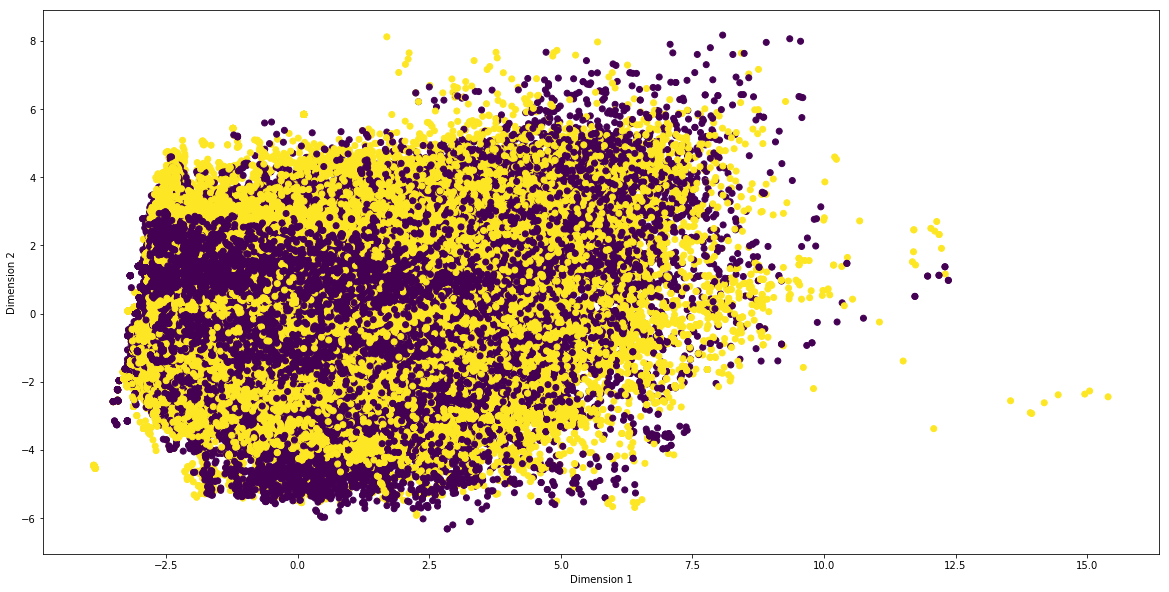

In [21]:
import matplotlib.pyplot as plt

reduced_data = pca.transform(pca_data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], c=label, label=label)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.rcParams["figure.figsize"] = (20,10)
plt.show();

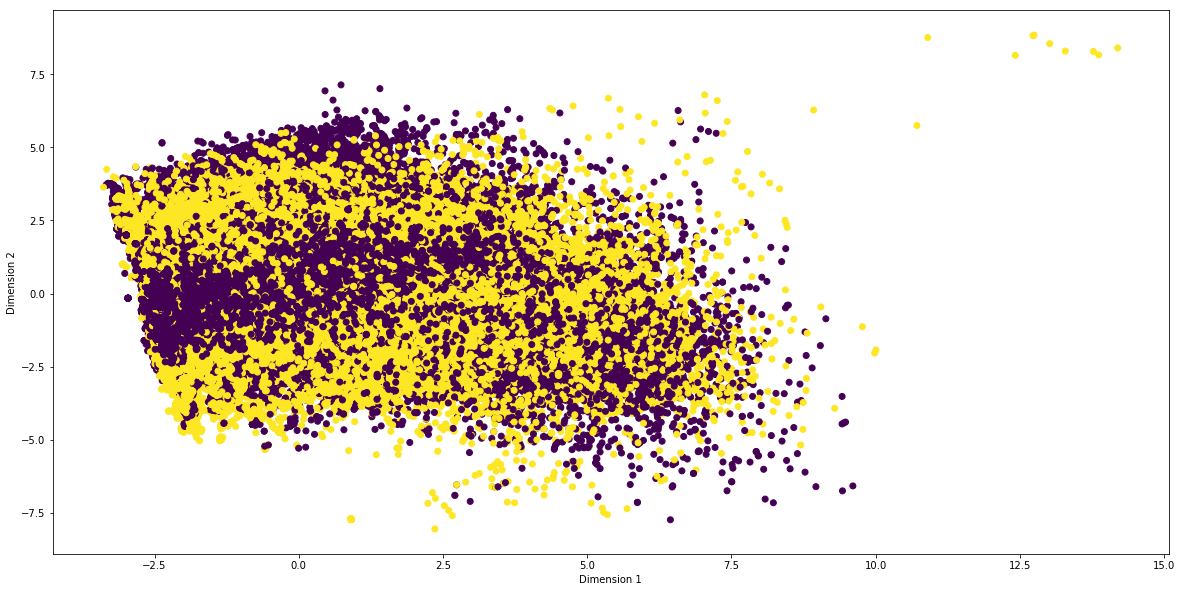

In [22]:
merged_data_zarok = pd.DataFrame()
for key, value in data_zarok.data_dict.items():
    merged_data_zarok = pd.concat([merged_data_zarok, value])
    
label_zarok = merged_data_zarok["RecommendedAct"]
feature_data_zarok = merged_data_zarok.drop(["RecommendedAct"], axis=1)

pca_data_zarok = StandardScaler().fit_transform(feature_data_zarok)

pca_zarok = PCA(n_components = 2)
pca_zarok = pca.fit(pca_data_zarok)

reduced_data_zarok = pca.transform(pca_data_zarok)
reduced_data_zarok = pd.DataFrame(reduced_data_zarok, columns = ['Dimension 1', 'Dimension 2'])

plt.scatter(reduced_data_zarok['Dimension 1'], reduced_data_zarok['Dimension 2'], c=label_zarok, label=label_zarok)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.rcParams["figure.figsize"] = (20,10)
plt.show();

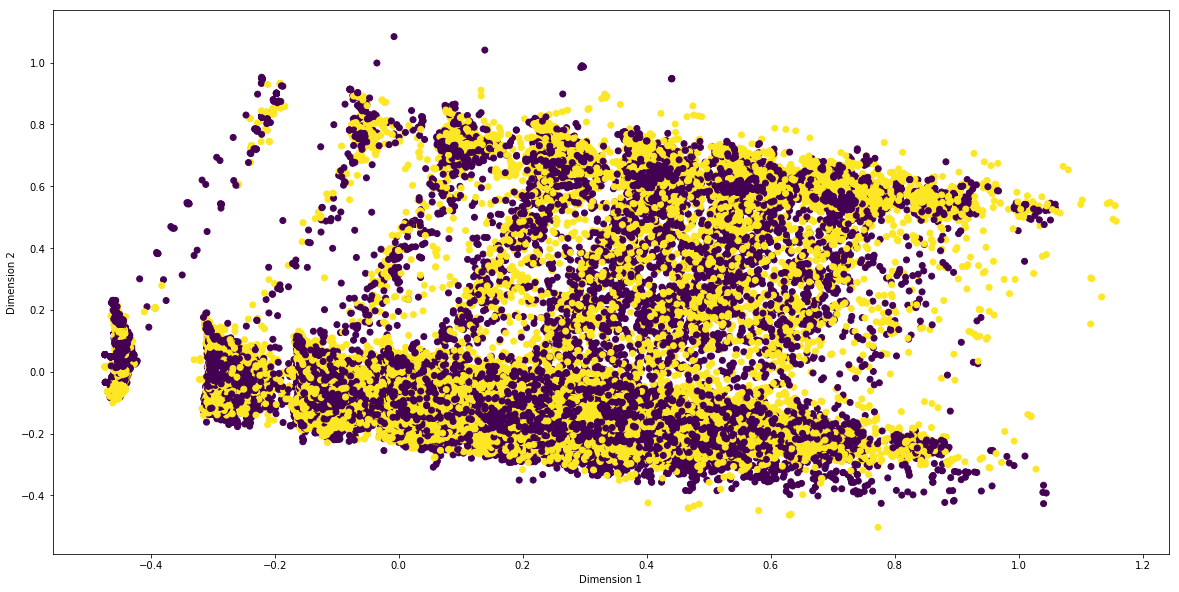

In [10]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA

merged_data_zarok = pd.DataFrame()
for key, value in data_zarok.data_dict.items():
    merged_data_zarok = pd.concat([merged_data_zarok, value])
    
label_zarok = merged_data_zarok["RecommendedAct"]
feature_data_zarok = merged_data_zarok.drop(["RecommendedAct"], axis=1)
feature_data_zarok = feature_data_zarok.values

pca_data_zarok = MinMaxScaler().fit_transform(feature_data_zarok)

pca_zarok = PCA(n_components = 2)
pca_zarok = pca_zarok.fit(pca_data_zarok)

reduced_data_zarok = pca_zarok.transform(pca_data_zarok)
reduced_data_zarok = pd.DataFrame(reduced_data_zarok, columns = ['Dimension 1', 'Dimension 2'])

plt.scatter(reduced_data_zarok['Dimension 1'], reduced_data_zarok['Dimension 2'], c=label_zarok, label=label_zarok)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.rcParams["figure.figsize"] = (20,10)
plt.show();

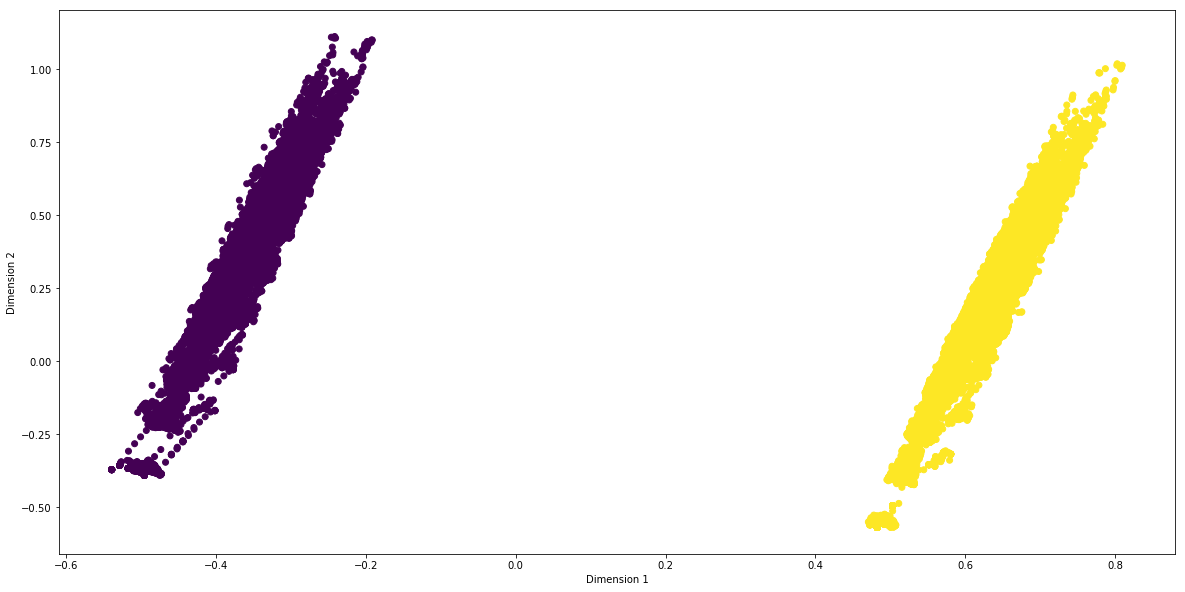

In [11]:
pca_data_zarok = MinMaxScaler().fit_transform(merged_data_zarok)

pca_zarok = PCA(n_components = 2)
pca_zarok = pca_zarok.fit(pca_data_zarok)

reduced_data_zarok = pca_zarok.transform(pca_data_zarok)
reduced_data_zarok = pd.DataFrame(reduced_data_zarok, columns = ['Dimension 1', 'Dimension 2'])

plt.scatter(reduced_data_zarok['Dimension 1'], reduced_data_zarok['Dimension 2'], c=label_zarok, label=label_zarok)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.rcParams["figure.figsize"] = (20,10)
plt.show();